In [111]:
import numpy as np                # This is for reading the files.
import pandas as pd               # This is for creating multi-dimensional array.
import matplotlib.pyplot as plt   # This is for plotting.
import seaborn as sns             # This is for data visualization.
import warnings                   # This is for ignoring warnings.
warnings.filterwarnings("ignore")
%matplotlib inline

In [112]:
test= pd.read_csv('test1.csv')
train= pd.read_csv('train1.csv')        

Test File

In [113]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [114]:
test.shape

(367, 12)

## Training Dataset

In [115]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [116]:
train.shape

(614, 13)

We create a copy of file so that any changes made doesn't affect the original datasets

In [117]:
test_original= test.copy()
train_original= train.copy()

We check the Data Types of Variables.

In [118]:
test.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [119]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

# Univariant Analysis

We examine each variable individually.

The target Variable which is the 'Loan Status'.

In [120]:
train['Loan_Status'].value_counts()  

Y    422
N    192
Name: Loan_Status, dtype: int64

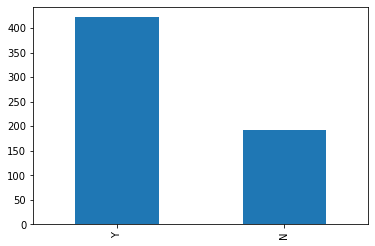

In [121]:
train['Loan_Status'].value_counts().plot.bar();

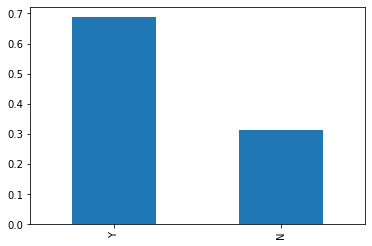

In [122]:
train['Loan_Status'].value_counts(normalize=True).plot.bar();
#Note: normalize = True gives the probability in y-axis.

We plot for Independent Categorical Variables.

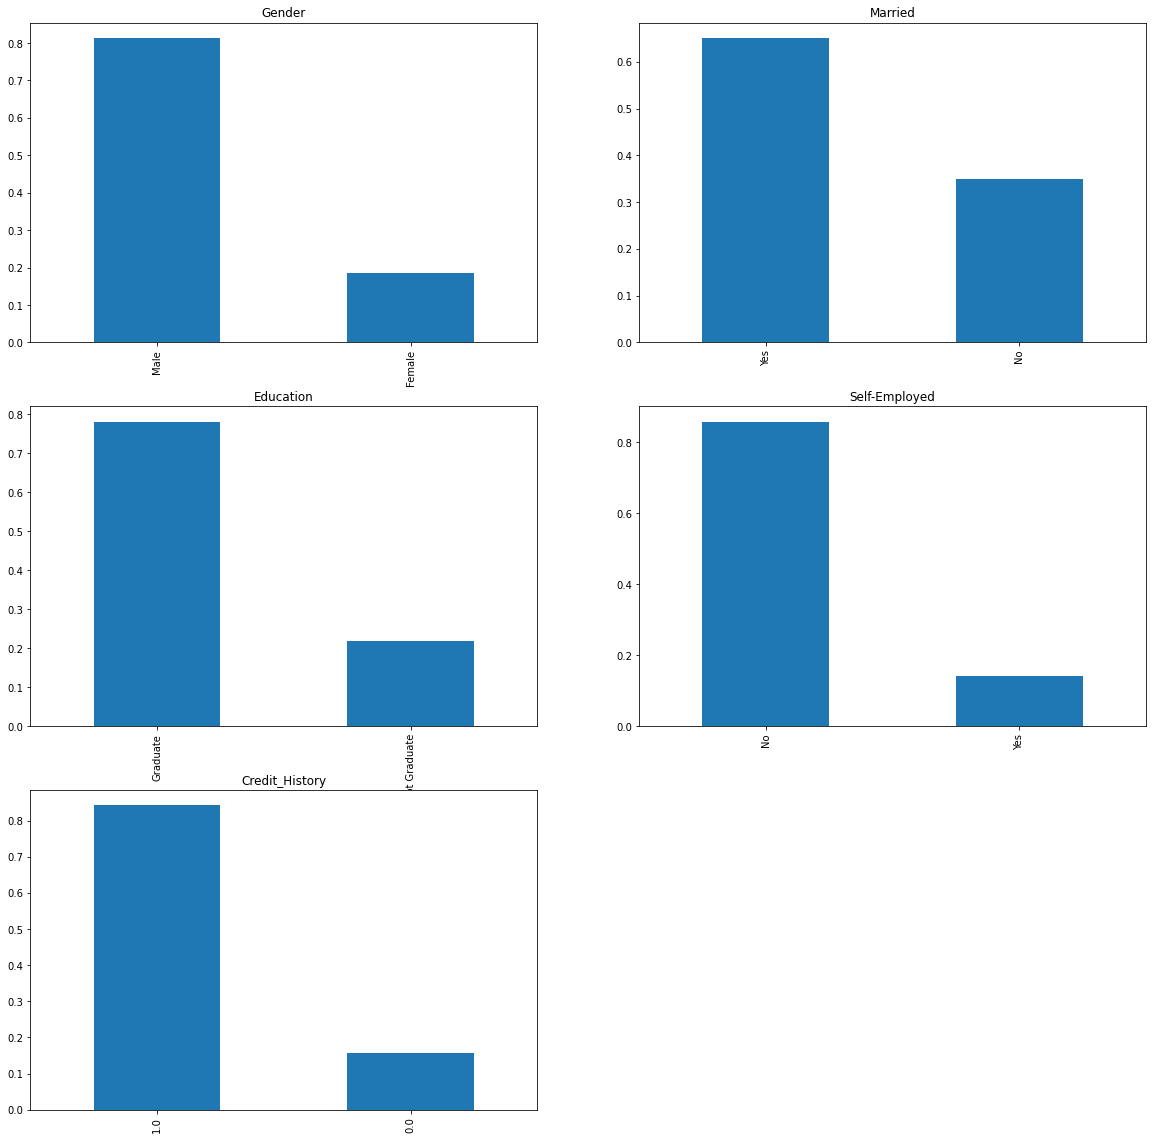

In [123]:
plt.figure()
plt.subplot(321)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,20),title='Gender')

plt.subplot(322)
train['Married'].value_counts(normalize=True).plot.bar(figsize=(20,20),title='Married')

plt.subplot(323)
train['Education'].value_counts(normalize=True).plot.bar(figsize=(20,20),title='Education')

plt.subplot(324)
train['Self_Employed'].value_counts(normalize=True).plot.bar(figsize=(20,20),title='Self-Employed')

plt.subplot(325)
train['Credit_History'].value_counts(normalize=True).plot.bar(figsize=(20,20),title='Credit_History');

We plot for Independent Ordinal Variables.

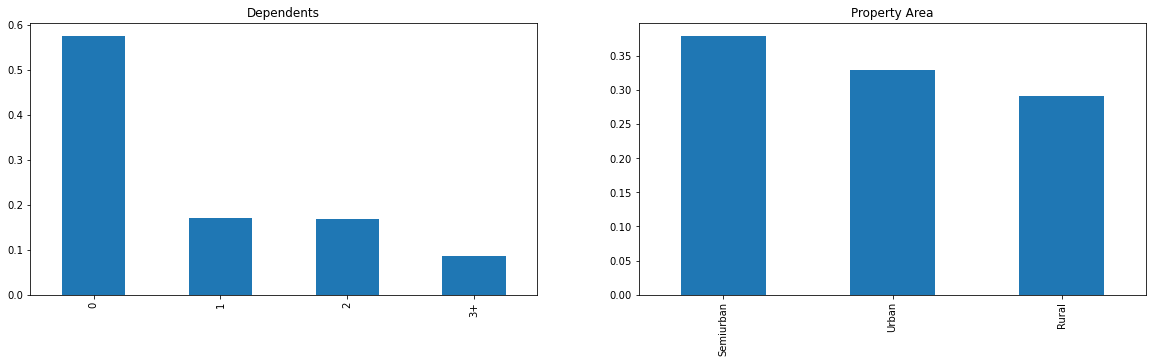

In [124]:
plt.figure()
plt.subplot(121)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(20,5),title='Dependents')

plt.subplot(122)
train['Property_Area'].value_counts(normalize=True).plot.bar(figsize=(20,5),title='Property Area');

We plot for Independent Numerical Variables

Applicant Income

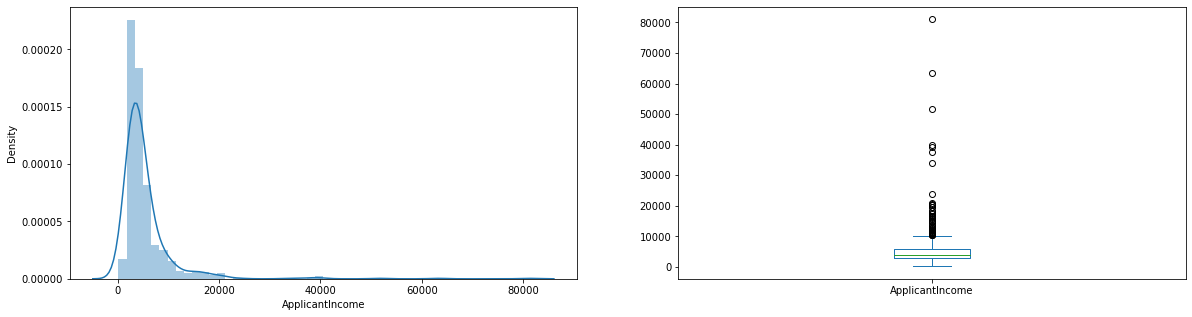

In [125]:
plt.subplot(121)
sns.distplot(train['ApplicantIncome'])
plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(20,5));

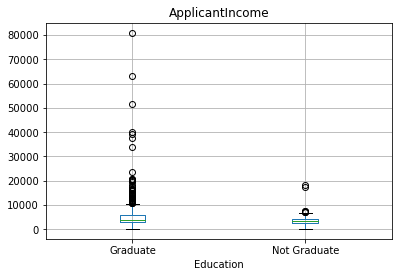

In [126]:
train.boxplot(column='ApplicantIncome',by='Education')
plt.suptitle("");

Co-applicant Income

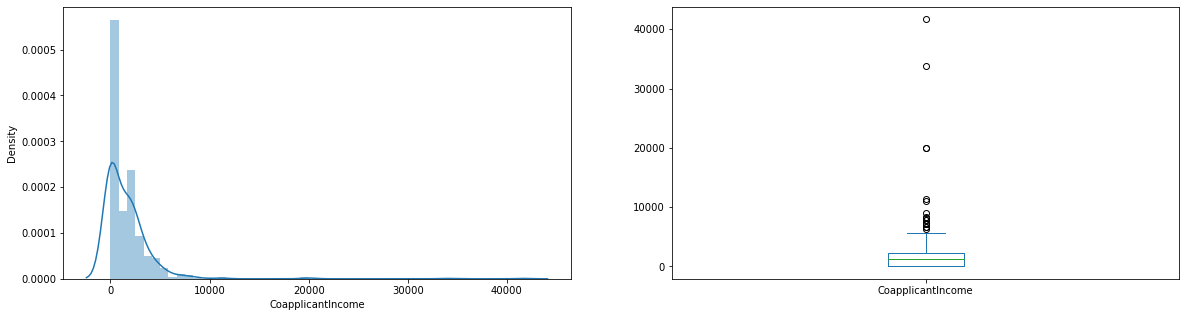

In [127]:
plt.subplot(121)
sns.distplot(train['CoapplicantIncome'])
plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(20,5));

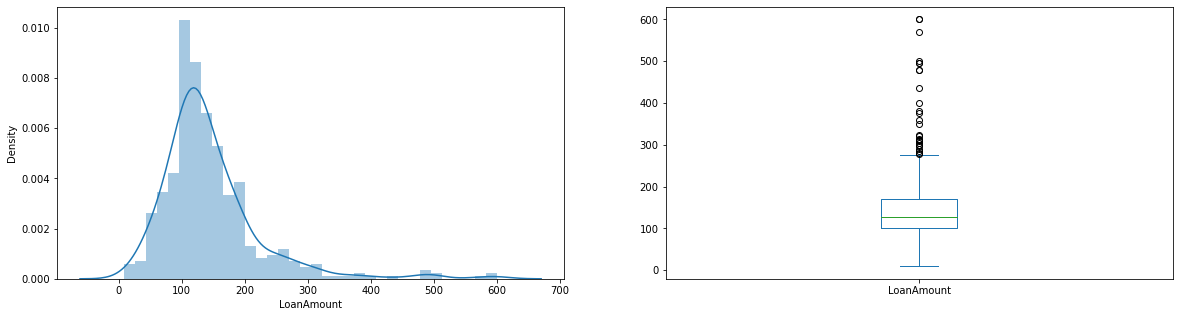

In [128]:
df=train.dropna()
plt.subplot(121)
sns.distplot(df['LoanAmount'])

plt.subplot(122)
df['LoanAmount'].plot.box(figsize=(20,5));

# Bivariant Analysis

We examine two variables at a time.

Frequency Table for Gender and Loan Status

In [129]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status']) 
Gender

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


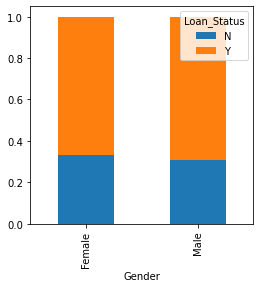

In [130]:
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4));

Frequency Table for Married and Loan Status

In [131]:
Married=pd.crosstab(train['Married'],train['Loan_Status']) 
Married

Loan_Status,N,Y
Married,,
No,79,134
Yes,113,285


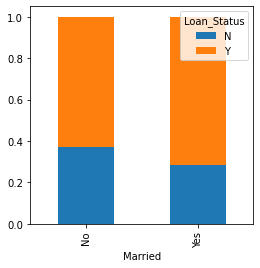

In [132]:
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4));

Frequency Table for Dependents and Loan Status

In [133]:
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status']) 
Dependents

Loan_Status,N,Y
Dependents,,
0,107,238
1,36,66
2,25,76
3+,18,33


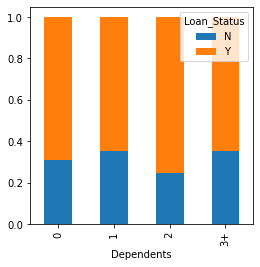

In [134]:
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4));

Frequency Table for Education and Loan Status

In [135]:
Education= pd.crosstab(train['Education'],train['Loan_Status'])
Education

Loan_Status,N,Y
Education,,
Graduate,140,340
Not Graduate,52,82


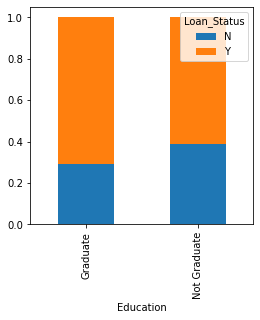

In [136]:
Education.div(Education.sum(1).astype(float),axis=0).plot(kind="bar", stacked=True, figsize=(4,4));

Frequency Table for Self Employed and Loan Status

In [137]:
Self_Employed= pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Self_Employed

Loan_Status,N,Y
Self_Employed,,
No,157,343
Yes,26,56


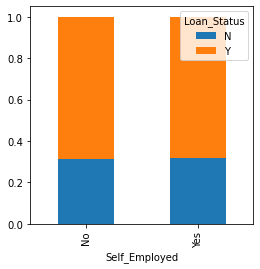

In [138]:
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4));

Frequency Table for Credit History and Loan Status

In [139]:
Credit_History= pd.crosstab(train['Credit_History'],train['Loan_Status'])
Credit_History

Loan_Status,N,Y
Credit_History,,
0.0,82,7
1.0,97,378


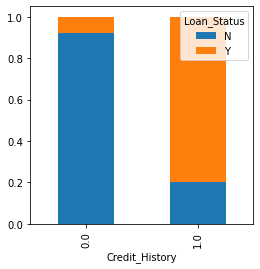

In [140]:
Credit_History.div(Credit_History.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True, figsize=(4,4));

Frequency Table for Property Area and Loan Status

In [141]:
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status'])
Property_Area

Loan_Status,N,Y
Property_Area,,
Rural,69,110
Semiurban,54,179
Urban,69,133


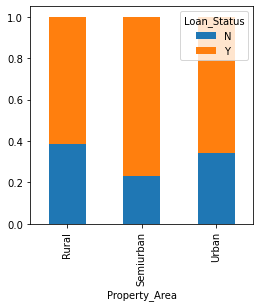

In [142]:
Property_Area.div(Property_Area.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True, figsize=(4,4));

We plot of Numerical Categorical Variable and Loan Status

In [143]:
bins=[0,2500,4000,6000,8100] 
group=['Low','Average','High', 'Very high'] 
train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)

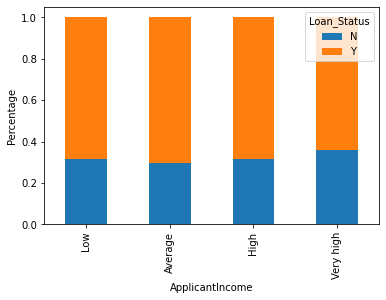

In [144]:
Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status']) 
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('ApplicantIncome') 
P=plt.ylabel('Percentage')

We do the same for Coapplicant Income.

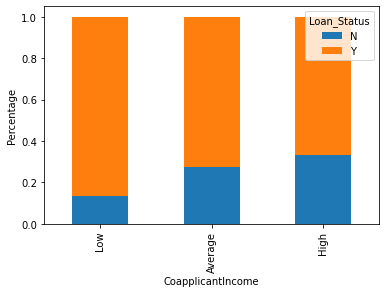

In [145]:
bins=[0,1000,3000,42000] 
group=['Low','Average','High'] 
train['Coapplicant_Income_bin']=pd.cut(train['CoapplicantIncome'],bins,labels=group)
Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status']) 
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('CoapplicantIncome') 
P = plt.ylabel('Percentage')

It shows that if Coapplicant’s income is less the chances of loan approval are high. But this is not look right. 
The possible reason behind this is such that most of the applicants don’t have any coapplicant so the coapplicant income for such applicants is 0 and therefore the loan approval is not dependent on it. 
We can then make a new variable in which we will combine the applicant’s and coapplicant’s income to visualize the combined effect of income on loan approval.

Let us combine the Applicant Income and Coapplicant Income and see the combined effect of Total Income on the Loan_Status.

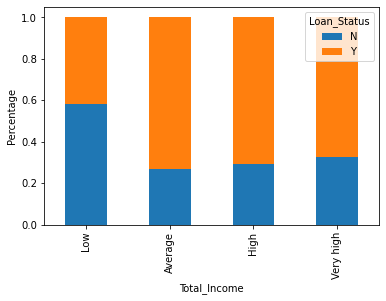

In [146]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high'] 
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status']) 
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('Total_Income') 
P = plt.ylabel('Percentage')

We plot of Loan Amount and Loan Status

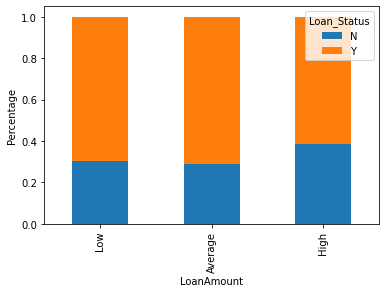

In [147]:
bins=[0,100,200,700] 
group=['Low','Average','High'] 
train['LoanAmount_bin']=pd.cut(train['LoanAmount'],bins,labels=group)
LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status']) 
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('LoanAmount') 
P = plt.ylabel('Percentage')


We change the 3+ in dependents variable to 3 to make it a numerical variable and We will also convert the target variable’s categories into 0 and 1.

In [148]:
train['Dependents'].replace('3+', 3,inplace=True) 
test['Dependents'].replace('3+', 3,inplace=True) 

We convert the target variable 'Loan Status' categories into 0 and 1 for logistic regression.

In [149]:
train['Loan_Status'].replace('N', 0,inplace=True) 
train['Loan_Status'].replace('Y', 1,inplace=True)

# Correlation using Heatmaps

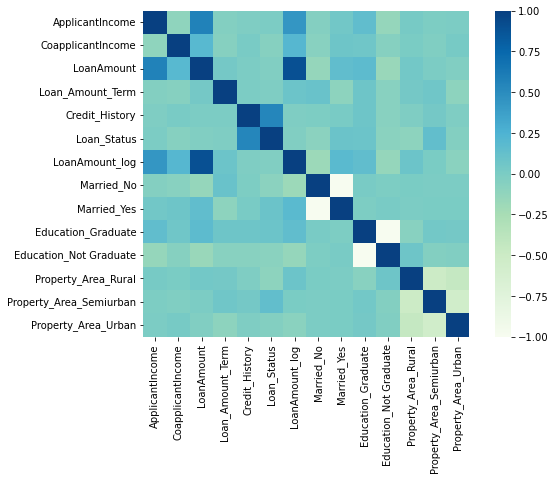

In [198]:
matrix = train.corr() 
plt.figure(figsize=(9,6))
sns.heatmap(matrix, square=True, cmap="GnBu");
plt.savefig("Correlation.png")

In [151]:
train=train.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)

In [152]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


Handling the missing Data

Checking the number of null values.

In [153]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

So There are null values in Gender,Married,Dependents,Self_Employed,LoanAmount,Loan_Amount_Term. We replace the null values with the mode of the respective columns so that the values does not affect the result.

In [154]:
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)

In [155]:
train['Married'].fillna(train['Married'].mode()[0],inplace=True)

In [156]:
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)

In [157]:
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)

In [158]:
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)

In [159]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)

In [160]:
train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)

In [161]:
test['Gender'].fillna(test['Gender'].mode()[0],inplace=True)

In [162]:
test['Married'].fillna(test['Married'].mode()[0],inplace=True)

In [163]:
test['Dependents'].fillna(test['Dependents'].mode()[0],inplace=True)

In [164]:
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0],inplace=True)

In [165]:
test['Credit_History'].fillna(test['Credit_History'].mode()[0],inplace=True)

In [166]:
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0],inplace=True)

In [167]:
test['LoanAmount'].fillna(test['LoanAmount'].median(),inplace=True)

# Outlier Treatment

There are many outliers in the Loan Amount. We perform the log transformation to make the distribution look normal.

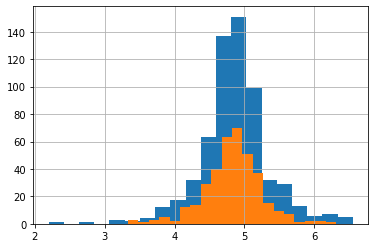

In [168]:

train['LoanAmount_log'] = np.log(train['LoanAmount']) 
train['LoanAmount_log'].hist(bins=20) 


test['LoanAmount_log'] = np.log(test['LoanAmount'])
test['LoanAmount_log'].hist(bins=20);

# Model Building

Loan_ID will not be used in the analysis.So, We are not dropping the Loan_ID Column.

In [169]:
train=train.drop('Loan_ID',axis=1)
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1,4.852030
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,4.852030
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,4.189655
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,4.787492
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,4.948760


In [170]:
test=test.drop('Loan_ID',axis=1)
test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,4.700480
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,4.836282
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,5.337538
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban,4.605170
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,4.356709


In [171]:
train=train.drop('Gender',axis=1)
test=test.drop('Gender',axis=1)

In [172]:
train=train.drop('Dependents',axis=1)
test=test.drop('Dependents',axis=1)

In [173]:
train=train.drop('Self_Employed',axis=1)
test=test.drop('Self_Employed',axis=1)

Also, We drop the Loan_Status column and store it in another variable.

In [174]:
x=train.drop('Loan_Status',axis=1)
x.head()

,Married,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log
0,No,Graduate,5849,0.0,128.0,360.0,1.0,Urban,4.852030
1,Yes,Graduate,4583,1508.0,128.0,360.0,1.0,Rural,4.852030
2,Yes,Graduate,3000,0.0,66.0,360.0,1.0,Urban,4.189655
3,Yes,Not Graduate,2583,2358.0,120.0,360.0,1.0,Urban,4.787492
4,No,Graduate,6000,0.0,141.0,360.0,1.0,Urban,4.948760


In [175]:
y=train['Loan_Status']
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

We create the Dummy Variable.

In [176]:
x=pd.get_dummies(x) 
train=pd.get_dummies(train) 
test=pd.get_dummies(test)

In [177]:
x.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,4.852030,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,4.852030,0,1,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,4.189655,0,1,1,0,0,0,1
3,2583,2358.0,120.0,360.0,1.0,4.787492,0,1,0,1,0,0,1
4,6000,0.0,141.0,360.0,1.0,4.948760,1,0,1,0,0,0,1


# Applying Logistic Regression

In [178]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(x,y, train_size =0.75,random_state=0)

In [179]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
model = LogisticRegression() 
model.fit(x_train, y_train)

LogisticRegression()

In [180]:
pred_cv = model.predict(x_cv)

In [181]:
accuracy_score(y_cv,pred_cv)

0.8376623376623377

In [182]:
from sklearn.metrics import confusion_matrix
c=confusion_matrix(y_cv,pred_cv)
c

array([[ 20,  23],
       [  2, 109]], dtype=int64)

In [183]:
test.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5720,0,110.0,360.0,1.0,4.700480,0,1,1,0,0,0,1
1,3076,1500,126.0,360.0,1.0,4.836282,0,1,1,0,0,0,1
2,5000,1800,208.0,360.0,1.0,5.337538,0,1,1,0,0,0,1
3,2340,2546,100.0,360.0,1.0,4.605170,0,1,1,0,0,0,1
4,3276,0,78.0,360.0,1.0,4.356709,1,0,0,1,0,0,1


In [184]:
pred_test = model.predict(test)

In [185]:
submission=pd.read_csv("Sample_Submission.csv",header=0)

In [186]:
submission['Loan_Status']=pred_test 
submission['Loan_ID']=test_original['Loan_ID']

In [187]:
submission.head()

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1


In [188]:
submission['Loan_Status'].replace(0, 'N',inplace=True) 
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [189]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('logistic.csv')

In [190]:
submission

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


# Applying Stratified K-means Clustering

In [191]:
from statistics import mean 

In [192]:
from sklearn.model_selection import StratifiedKFold

In [193]:
i=1 
pred_scores=[]
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(x,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = x.loc[train_index],x.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model = LogisticRegression(random_state=1)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test) 
    print('accuracy_score',score)     
    i+=1 
    pred_test = model.predict(test) 
    pred=model.predict_proba(xvl)[:,1]
    pred_scores.append(score)
print("\nMean of Accuracy Scores=",mean(pred_scores))

    


1 of kfold 5
accuracy_score 0.7967479674796748

2 of kfold 5
accuracy_score 0.8373983739837398

3 of kfold 5
accuracy_score 0.7967479674796748

4 of kfold 5
accuracy_score 0.8130081300813008

5 of kfold 5
accuracy_score 0.7950819672131147

Mean of Accuracy Scores= 0.807796881247501


# Decision Tree Algorithm

In [194]:
from sklearn import tree

In [195]:
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(x,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = x.loc[train_index],x.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = tree.DecisionTreeClassifier(random_state=1)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1 
pred_test = model.predict(test)


1 of kfold 5
accuracy_score 0.6585365853658537

2 of kfold 5
accuracy_score 0.7154471544715447

3 of kfold 5
accuracy_score 0.7235772357723578

4 of kfold 5
accuracy_score 0.7154471544715447

5 of kfold 5
accuracy_score 0.6475409836065574


In [196]:
submission['Loan_Status']=pred_test            
submission['Loan_ID']=test_original['Loan_ID'] 
submission.head()

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,0
4,LP001051,1


In [197]:
submission['Loan_Status'].replace(0, 'N',inplace=True) 
submission['Loan_Status'].replace(1, 'Y',inplace=True)

pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Decision Tree.csv')